In [9]:
import torch
from torch import nn
from aeon.datasets import load_classification
import matplotlib.pyplot as plt

In [8]:
X_train, y_train, metadata = load_classification('ECG200', split='TRAIN')

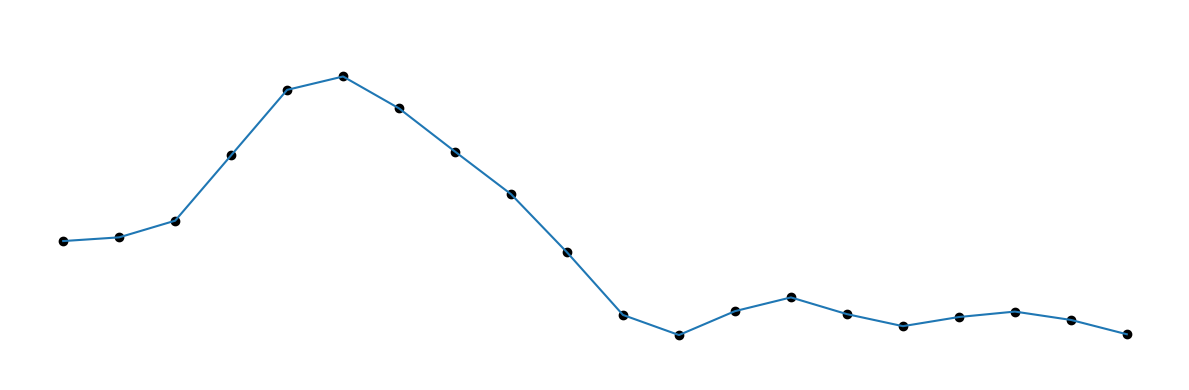

In [20]:
plt.figure(figsize=(12, 4))
plt.plot(X_train[0][0][:20])
plt.scatter(list(range(20)), X_train[0][0][:20], color='black')
plt.ylim((-1, 3))
plt.axis('off')
plt.tight_layout()

In [16]:
conv = nn.Conv1d(in_channels=1, out_channels=1, padding='same', kernel_size=5, bias=False)
conv.weight

Parameter containing:
tensor([[[-0.4367,  0.2417,  0.4208,  0.2327,  0.1887]]], requires_grad=True)

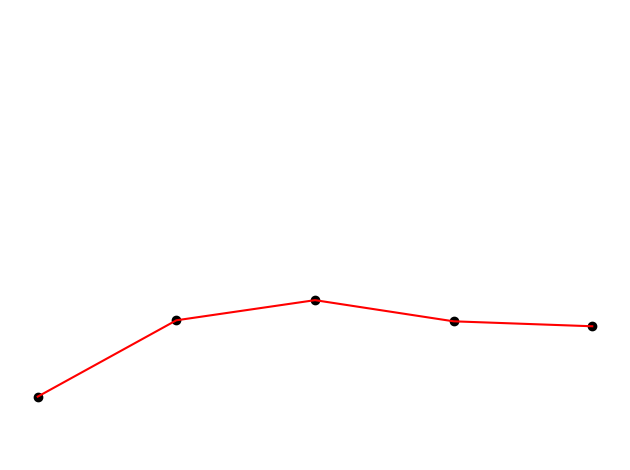

In [28]:
# plt.figure(figsize=(12, 4))
plt.plot(conv.weight.detach().numpy()[0, 0, :], color='red')
plt.scatter(list(range(5)), conv.weight.detach().numpy()[0, 0, :], color='black')
plt.ylim((-1, 3))
# plt.xlim((0, 100))
plt.axis('off')

plt.tight_layout()

In [37]:
sample = torch.from_numpy(X_train[:1, :, :20]).float()
sample = conv(sample)
sample.shape

torch.Size([1, 1, 20])

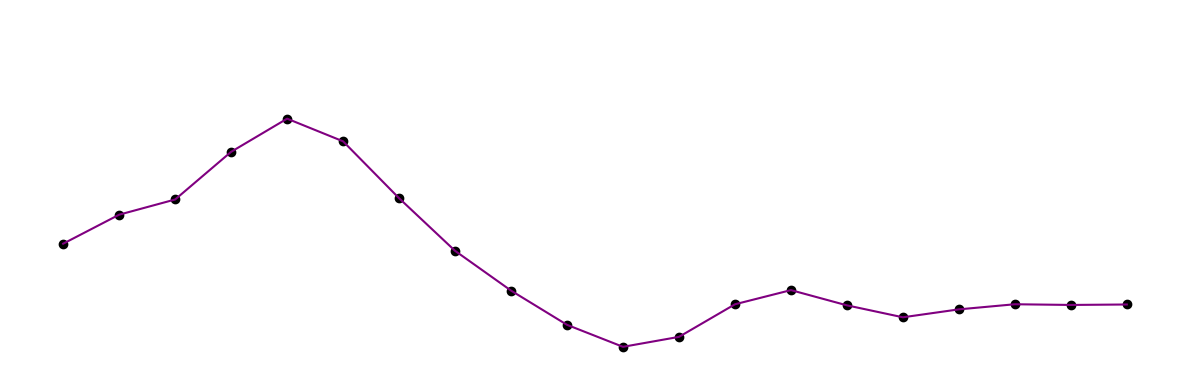

In [40]:
plt.figure(figsize=(12, 4))
plt.plot(sample.detach().numpy()[0, 0, :], color='purple')
plt.scatter(list(range(20)), sample.detach().numpy()[0, 0, :], color='black')
plt.ylim((-1, 3))
plt.axis('off')
plt.tight_layout()

In [ ]:
from aeon.datasets import load_from_tsfile